<a href="https://colab.research.google.com/github/rrstats/Coursework-Foundations-of-Data-Science-/blob/main/L30_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plots
plt.style.use('fivethirtyeight')


In [ ]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color, lw=3)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

In [ ]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='#1e90ff'):
    y = x*slope + intercept
    plots.plot(x, y, color=color, lw=3)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color, lw=3)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_scatter(r):
    """Generate a scatter plot with a correlation approximately r"""
    plots.figure(figsize=(5,5))
    x, y = make_correlated_data(r)
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)
    
def r_table(r):
    """
    Generate a table of 1000 data points with a correlation approximately r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

Lecture 30

In [ ]:
def standard_units(x):
  #Convert an array of numbers to standard units
  return (x - np.average(x)) / np.std(x)

In [ ]:
def correlation(t, x, y):

  x_in_standard_units = standard_units(t.column(x))
  y_in_standard_units = standard_units(t.column(y))
  return np.average(x_in_standard_units*y_in_standard_units)

**Ecological Correlations**

In [ ]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547
Arkansas,4.2,573,571,554,1698
California,60.3,498,510,496,1504
Colorado,14.3,582,586,567,1735
Connecticut,88.4,507,510,508,1525
Delaware,100,456,459,444,1359
District of Columbia,100,440,438,431,1309
Florida,72.2,491,485,472,1448


Most Important Column

PARTICIPATION RATE

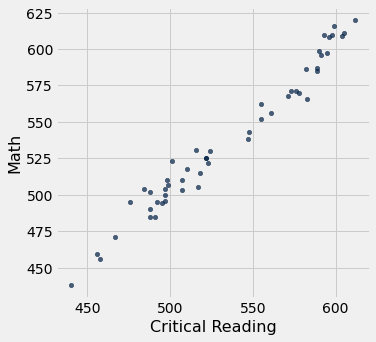

In [ ]:
sat2014.scatter('Critical Reading', 'Math') 

Ridiculously Linear

In [ ]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

Do states take the SAT?


In [ ]:
def rate_code(x):
  if x<= 25:
    return 'low'
  elif x<= 50:
    return 'low-moderate'
  elif x<=75:
    return 'moderate-high'
  else:
    return 'high'

In [ ]:
rate_codes = sat2014.apply(rate_code, 'Participation Rate')

In [ ]:
sat2014 = sat2014.with_columns('Rate Code', rate_codes)
sat2014

State,Participation Rate,Critical Reading,Math,Writing,Combined,Rate Code
Alabama,6.7,547,538,532,1617,low
Alaska,54.2,507,503,475,1485,moderate-high
Arizona,36.4,522,525,500,1547,low-moderate
Arkansas,4.2,573,571,554,1698,low
California,60.3,498,510,496,1504,moderate-high
Colorado,14.3,582,586,567,1735,low
Connecticut,88.4,507,510,508,1525,high
Delaware,100,456,459,444,1359,high
District of Columbia,100,440,438,431,1309,high
Florida,72.2,491,485,472,1448,moderate-high


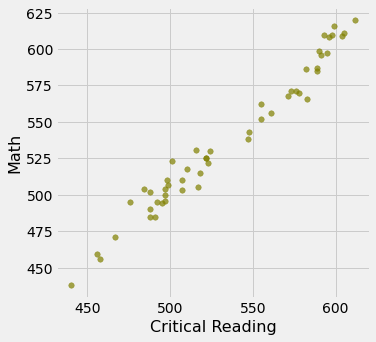

In [ ]:
sat2014.scatter('Critical Reading', 'Math', color='olive', s=30) 

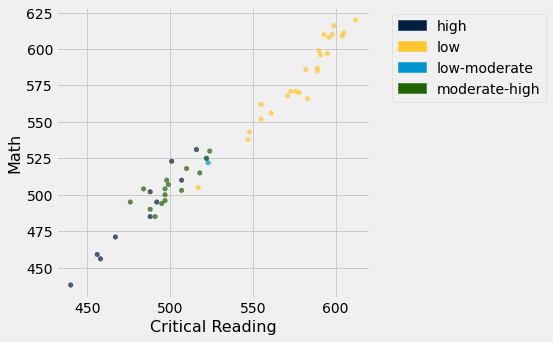

In [ ]:
sat2014.scatter('Critical Reading', 'Math', colors='Rate Code') 

In [ ]:
sat2014.where('Rate Code', 'low')

State,Participation Rate,Critical Reading,Math,Writing,Combined,Rate Code
Alabama,6.7,547,538,532,1617,low
Arkansas,4.2,573,571,554,1698,low
Colorado,14.3,582,586,567,1735,low
Illinois,4.6,599,616,587,1802,low
Iowa,3.1,605,611,578,1794,low
Kansas,5.3,591,596,566,1753,low
Kentucky,4.6,589,585,572,1746,low
Louisiana,4.6,561,556,550,1667,low
Michigan,3.8,593,610,581,1784,low
Minnesota,5.9,598,610,578,1786,low


In [ ]:
sat2014.where('Rate Code', 'high').show()

State,Participation Rate,Critical Reading,Math,Writing,Combined,Rate Code
Connecticut,88.4,507,510,508,1525,high
Delaware,100,456,459,444,1359,high
District of Columbia,100,440,438,431,1309,high
Georgia,77.2,488,485,472,1445,high
Idaho,100,458,456,450,1364,high
Maine,95.6,467,471,449,1387,high
Maryland,78.5,492,495,481,1468,high
Massachusetts,84.1,516,531,509,1556,high
New Jersey,79.3,501,523,502,1526,high
New York,76.3,488,502,478,1468,high


## Nearest Neighbour Regression
A method for prediction


*   Group each x with similar (nearby) x values
*   Average the corresponding y values for each group

For each x value, the prediction is the average of the y values in its nearby group

The graph of these predictions is the "graph of averages"

If the association between x & y is linear, then points in the graph of averages tend to fall on a line




### Prediction Lines

In [ ]:
#r=0.99

example = r_table(0.99)
example.show(3)

x,y
0.0912047,-0.0680119
1.09128,1.04391
-1.94697,-1.88316


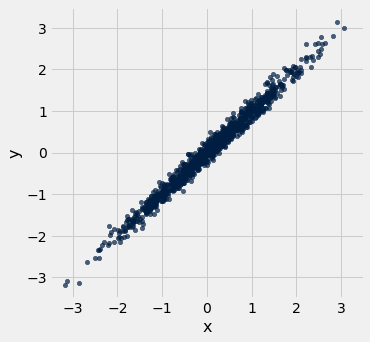

In [ ]:
example.scatter('x', 'y')
resize_window()

In [ ]:
def nn_prediction_example(x_val):
  neighbors = example.where('x', are.between(x_val - 0.25, x_val + .25))
  return np.mean(neighbors.column('y'))

In [ ]:
nn_prediction_example(-2.25)

-2.41472076758669

In [ ]:
example=example.with_column